In [1]:
# Do not modify import block, all necessary imports are included
# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn import datasets
import random

# for plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# this is for density plotting
from matplotlib import colorbar, colors
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# import gsw
import math

# for the polygon intersections
import shapely.geometry as sg

# for plotting
import time
import warnings
warnings.filterwarnings('ignore')

#import "/scratch/project_2000789/muramarg/miniconda3/lib/python3.10/site-packages/gsw"
import sys
 
# appending a path
# sys.path.append('/scratch/project_2000789/muramarg/miniconda3/lib/python3.10/site-packages/')
 
# importing required module
import gsw

from scipy.interpolate import interpn

In [2]:
import netCDF4 as nc

In [3]:
# for plotting
import time
import warnings
warnings.filterwarnings('ignore')
from shapely.ops import unary_union
from shapely import Point

## import the files we need

In [4]:
ds = xr.open_dataset("/scratch/mmurakami/WAOM/output/rearranged_output.nc")
weeks = np.loadtxt("weeks_released.txt")
# Open the file
with nc.Dataset('drifter_labels.nc', 'r') as ds1:
    # Check the variable names
    print(ds1.variables.keys())  # likely: 'drifter_label'

    # Read the variable
    drifter_labels = ds1.variables['drifter_label'][:]

print("Loaded drifter labels:", drifter_labels)

# load the longitude and latitude
dg = xr.open_dataset("/scratch/mmurakami/WAOM/output/waom10extend_grd.nc")
ds1 = xr.open_dataset('/scratch/mmurakami/WAOM/output/ocean_avg_0001.nc')

dict_keys(['drifter_label'])
Loaded drifter labels: ['mackenzie' 'mackenzie' 'mackenzie' ... 'other' 'other' 'other']


In [5]:
depth = ds.depth.values

# Figure 1

Figure 1 and any mapping needs to be done in Puhti so we can have ccrs

# Figure 2

In [7]:
# colors need to be relabeled as this: 
# --- Polynya boundaries ---
# ax.plot(long_darnley, lat_darnley, transform=ccrs.PlateCarree(), color="forestgreen", label="Darnley", zorder=6, linewidth=3)
# ax.plot(long_mackenzie, lat_mackenzie, transform=ccrs.PlateCarree(), color="darkviolet", label="MacKenzie", zorder=11, linewidth=3)
# ax.plot(long_davis, lat_davis, transform=ccrs.PlateCarree(), color="gold", label="Davis", zorder=11, linewidth=3)
# ax.plot(long_barrier, lat_barrier, transform=ccrs.PlateCarree(), color="deepskyblue", label="Barrier", zorder=11, linewidth=3)
# Example variables
drifter_labels = np.array(drifter_labels)
weeks = np.array(weeks)
weeks

array([21., 22., 24., ..., 33., 27., 35.])

In [ ]:
group1 = [0, 0, 0, 0, 20, 180, 270, 260, 280, 90, 10, 0, 0]      # Blue
group2 = [0, 0, 0, 0, 90, 230, 310, 310, 340, 340, 230, 0, 0]    # Green
group3 = [0, 0, 0, 0, 120, 190, 160, 200, 145, 20, 5, 0, 10]     # Cyan
group4 = [0, 0, 0, 0, 20, 30, 70, 60, 75, 50, 10, 0, 5]          # Purple
group5 = [0, 0, 0, 0, 10, 20, 30, 40, 30, 20, 10, 0, 0]          # Orange or additional trajectory

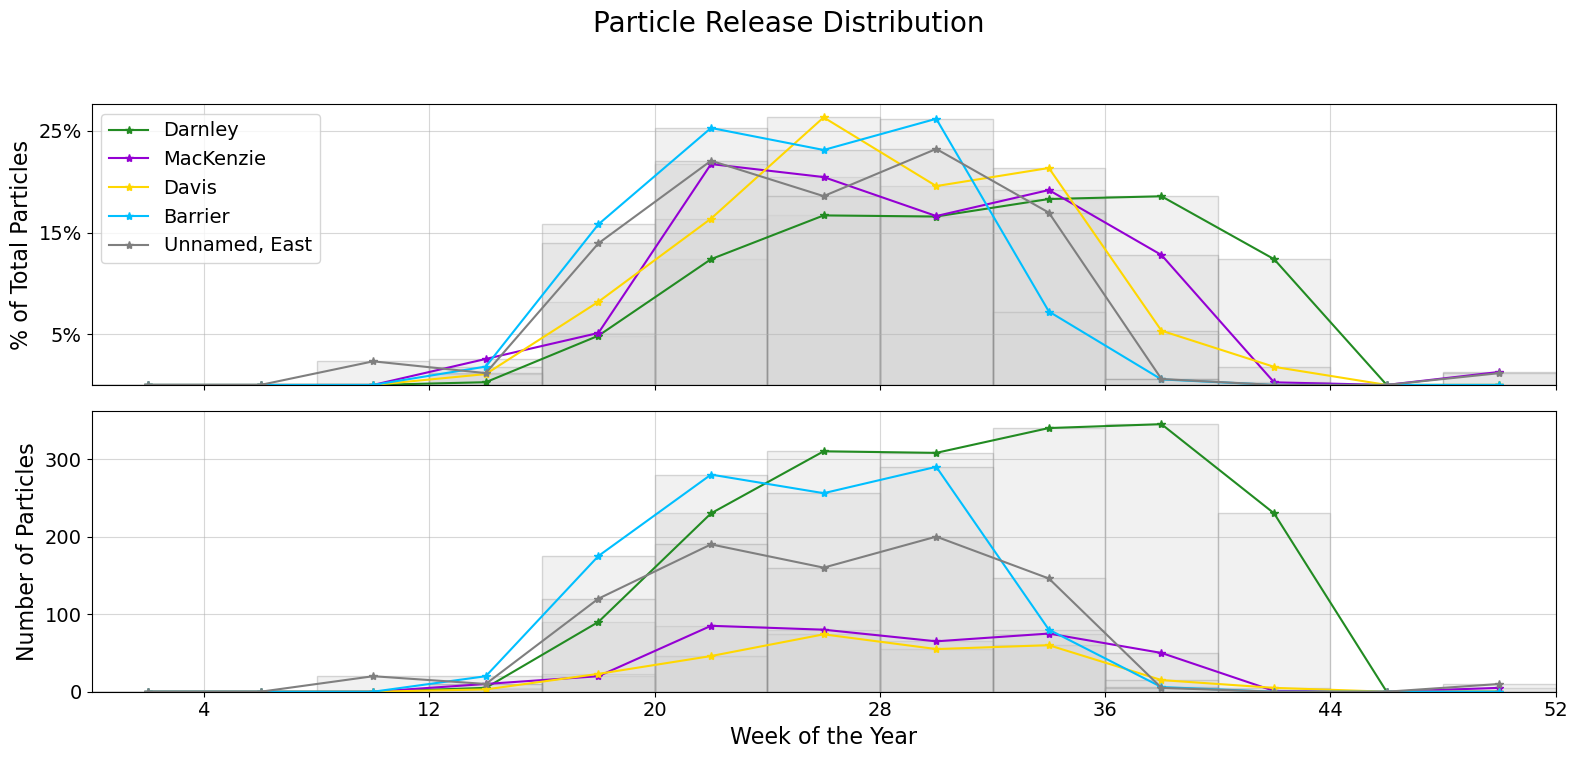

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Group data
group1 = [0, 0, 0, 5, 90, 230, 310, 308, 340, 345, 230, 0, 0]
group2 = [0, 0, 0, 10, 20, 85, 80, 65, 75, 50, 1, 0, 5]
group3 = [0, 0, 0, 3, 23, 46, 74, 55, 60, 15, 5, 0, 0]
group4 = [0, 0, 0, 20, 175, 280, 256, 290, 80, 6, 0, 0,0]
group5 = [0, 0, 20, 10, 120, 190, 160, 200, 146, 5, 0, 0, 10]

groups = [group1, group2, group3, group4, group5]
colors = ['forestgreen','darkviolet', 'gold', 'deepskyblue', 'tab:gray']
labels = ['Darnley','MacKenzie','Davis', 'Barrier', 'Unnamed, East']

# X values and shifted version
x = np.arange(1, len(group1) + 1)
x_shifted = x + 0.5  # To center over each week bin

# Plot setup
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=1, sharex=True)
plt.rcParams.update({'font.size': 14})
plt.suptitle("Particle Release Distribution", fontsize=20)
# fig.supxlabel('Week of the Year', fontsize=18)

# FIRST SUBPLOT — normalized fractions
for group, color, label in zip(groups, colors, labels):
    group = np.array(group)
    total = group.sum()
    y = group / total if total > 0 else np.zeros_like(group)
    
    ax[0].bar(x_shifted, y, width=1, color='lightgray', alpha=0.3, edgecolor='gray', align='center')
    ax[0].plot(x_shifted, y, '-*', color=color, label=label)

ax[0].set_ylabel('% of Total Particles', fontsize=16)
ax[0].set_yticks([0.05, 0.15, 0.25])
ax[0].set_yticklabels(["5%", "15%", "25%"], fontsize=14)
ax[0].legend(loc="best", fontsize=14)
ax[0].grid(alpha=0.5)

# SECOND SUBPLOT — absolute counts
for group, color, label in zip(groups, colors, labels):
    group = np.array(group)
    ax[1].bar(x_shifted, group, width=1, color='lightgray', alpha=0.3, edgecolor='gray', align='center')
    ax[1].plot(x_shifted, group, '-*', color=color, label=label)

ax[1].set_ylabel('Number of Particles', fontsize=16)
ax[1].set_xlim([1, len(group1) + 1.5])  # <-- Shifted to include tick at 13.5
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].grid(alpha=0.5)
ax[1].set_xlabel("Week of the Year", fontsize=16)

# Set custom x-axis ticks at weeks 4, 12, ..., 52
xtick_positions = [2, 4, 6, 8, 10, 12, 14]
xtick_labels = [4, 12, 20, 28, 36, 44, 52]
ax[1].set_xticks(xtick_positions)
ax[1].set_xticklabels(xtick_labels, fontsize=14)

# Top plot (no labels)
ax[0].set_xticks(xtick_positions)
# ax[0].set_xticklabels([])

# Expand xlim to show final tick
ax[1].set_xlim([1, len(group1) + 1])

# Add bottom margin so labels aren't clipped
plt.subplots_adjust(bottom=0.12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("group_distribution_4weekbins_shifted.png", dpi=300)
plt.show()


# Figure 3

Figure 3 needs to be done in Puhti so we have representative tracks

In [20]:
# ds1  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0001.nc")
# ds2  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0002.nc")
# ds3  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0003.nc")
# ds4  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0004.nc")
# ds5  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0005.nc")
# ds6  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0006.nc")
# ds7  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0007.nc")
# ds8  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0008.nc")
# ds9  = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0009.nc")
# ds10 = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0010.nc")
# ds11 = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0011.nc")
# ds12 = xr.open_dataset("/scratch/mmurakami/WAOM/output/ocean_avg_0012.nc")

In [21]:
# # # needs files
# # ds = xr.open_dataset('/scratch/mmurakami/WAOM/output/ocean_avg_0001.nc')
# # create the lateral density gradient here so we can export it
# idx = 0
# # dg = xr.open_dataset("/scratch/project_2000789/muramarg/copied_files/waom10extend_grd.nc")
# lat_rho = dg.variables["lat_rho"]
# lon_rho = dg.variables["lon_rho"]
# eta_rho = np.arange(lat_rho.shape[0])  # e.g., 0 to 559
# xi_rho = np.arange(lat_rho.shape[1])   # e.g., 0 to 629

# dens1 = np.zeros((4,31,560,630))
# datasets = [ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10,ds11,ds12]
# for i,ds in enumerate(datasets):
#     print(i)

#     temp = ds["temp"].values
#     salt = ds["salt"].values

#     current_ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])

#     Zo_rho = (current_ds.hc * current_ds.s_rho + current_ds.Cs_r * current_ds.h) / (current_ds.hc + current_ds.h)

#     # Expand to 4D
#     zeta = current_ds.zeta.squeeze().expand_dims({"s_rho": current_ds.s_rho}, axis=1)
#     h = current_ds.h.squeeze().expand_dims({"s_rho": current_ds.s_rho}, axis=1)
#     zice = current_ds.zice.squeeze().expand_dims({"s_rho": current_ds.s_rho}, axis=1)

#     z_rho_data = zeta + (zeta + h) * Zo_rho + zice
#     print(z_rho_data.shape)

#     z_rho = xr.DataArray(
#         data=z_rho_data.data,
#         dims=["ocean_time", "s_rho", "eta_rho", "xi_rho"],
#         coords={
#             "ocean_time": ds["ocean_time"],
#             "s_rho": ds["s_rho"],
#             "eta_rho": eta_rho,
#             "xi_rho": xi_rho
#         },
#         name="z_rho"
#     )
#     # Overwrite all references to ocean_time with dummy index
#     dummy_time = np.arange(z_rho.sizes["ocean_time"])
    
#     # Replace time in both z_rho and dataset
#     z_rho = z_rho.assign_coords(ocean_time=dummy_time)
#     current_ds = current_ds.assign_coords(ocean_time=dummy_time)
#     current_ds = current_ds.assign_coords(z_rho=z_rho)

#     # Verify assignment
#     print("z_rho in coords:", "z_rho" in current_ds.coords)

#     # Assign lat/lon
#     current_ds = current_ds.assign_coords({
#         "lat_rho": (("eta_rho", "xi_rho"), lat_rho.values),
#         "lon_rho": (("eta_rho", "xi_rho"), lon_rho.values)
#     })

#     # Compute pressure and density
#     p = gsw.p_from_z(z=current_ds["z_rho"].values, lat=-66.8245)
#     #print(p.shape)
#     dens1 += gsw.rho(salt, temp, p) - 1000

#     #print("before:", id(ds1))
#     datasets[i] = current_ds
#     #print("after:", id(datasets[0]))
# ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10,ds11,ds12 = datasets

In [22]:
# # I don't think this is what we want - we want based on z, not bathymetry
# # depth will be ds.z_rho * ds_s_w for thicknesses

# bathymetry = np.array(ds1.z_rho[0][0].values)            # bathymetry

# s_rho = ds1.s_rho.values
# s_rho_fraction = np.array((1+s_rho))

# depths = np.full((31,560,630),np.nan)

# # for each column, get corresponding depth_sample  - sample depth

# # fill depths[0] with ds1.s_rho * sample_depth
# for y in range(depths.shape[1]):
#     for x in range(depths.shape[2]):
#         sample = bathymetry[y][x]
#         #print(sample,s_rho_fraction.shape)
#         array_depths = sample*s_rho_fraction           # array of sample depths at each layer
#         depths[:,y,x] = array_depths

# dz = np.diff(depths,axis=0)

# # create the mask
# mask = (depths >= -400) & (depths <= -100)

# # do delta z and mask out depths not in range
# dz = np.diff(depths,axis=0)
# dz = np.pad(dz, ((1, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)

# # depths[~mask] = np.nan
# # dz[~mask] = np.nan
# dz = dz.reshape((1,dz.shape[0],dz.shape[1],dz.shape[2]))

# mask = np.array(mask.astype(int))
# print(mask.shape)
# mask = mask.reshape(1,31,560,630)

In [23]:
# idx = 0
# long2 = 73.5089
# lat2 = -66.8245
# dx = 10000     # m
# dy = 10000     # m

# mask = (ds1.z_rho[0][0] >= -400) & (ds1.z_rho[0][0] <= -100)
# z_rho_masked = ds1.z_rho[0][0].where(mask)
# z_rho_masked = xr.where(~np.isnan(z_rho_masked), 1, z_rho_masked)
# mask = np.array(mask.astype(int))
# mask = mask.reshape(1,1,630,560)

# # 
# # plt.pcolormesh(z_rho_masked)

# #for ds in ,ds4,ds5,ds6,ds7,ds8,ds9,ds10,ds11,ds12:
# int_grad = np.zeros((4,630,560))
# for ds in ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10,ds11,ds12:
#     print("set",idx)
#     dens2 = np.zeros((4,31,630,560))
    
#     #### get salt and temp
#     temp = np.swapaxes(ds.variables["temp"],2,3)
#     salt = np.swapaxes(ds.variables["salt"],2,3)
#     p = ds.coords['z_rho'][0][0].T
#     SA = gsw.SA_from_SP(np.array(salt),np.array(p),long2,lat2)
#     CT = gsw.CT_from_pt(SA,np.array(temp))
#     dens2 = dens2 + gsw.rho(SA,CT,0)-1000           # density matrix, shape t,z,y,x
    
#     #d_rho_dx = spatial_derivative(dens2, 3)
#     #d_rho_dy = spatial_derivative(dens2, 2)
#     dens2_x = np.pad(dens2, ((0, 0), (0, 0), (1, 1), (0, 0)), mode='edge')
#     d_rho_dx = np.diff(dens2_x, axis=2) / dx
#     dens2_y = np.pad(dens2, ((0, 0), (0, 0), (0, 0), (1, 1)), mode='edge')
#     d_rho_dy = np.diff(dens2_y, axis=3) / dy                  # kg/m^4
    
#     #print(d_rho_dx.shape,d_rho_dy.shape)
    
#     magnitude_gradient = np.sqrt(d_rho_dx[:,:,:-1,:]**2 + d_rho_dy[:,:,:,:-1]**2)   # kg/m^3/m
#     #magnitude_gradient *= np.swapaxes(dz,2,3)
    
#     magnitude_gradient = np.array(magnitude_gradient)
    
#     integrated_gradient = np.mean(magnitude_gradient,axis=1)        # move to shape time, x, y
#     print(integrated_gradient.shape)
    
#     integrated_gradient = np.sum(magnitude_gradient, axis=1)   
    
#     int_grad += integrated_gradient
    
#     idx += 1
    


In [24]:
# levels = np.arange(0,0.2,0.02)
# print(levels)

# tmp = (np.sum(int_grad,axis=0)/4)

# cmap = plt.get_cmap('rainbow',20).copy()
# plt.contour(tmp,linestyles="solid",cmap=cmap)
# plt.colorbar(label="kg/m^4")
# plt.xlim(400,600)
# plt.ylim(300,500)

In [25]:
# tmp.shape
# np.save('tmp.npy', tmp)

# Figure 4, 5 require clustering

In [26]:
# create the clusters and check the final distributions
temp = ds['temp'].values
salt = ds['salt'].values
rho = ds['rho'].values
wmt = ds['wmt'].values
depth = ds['depth'].values

In [27]:
# create the clusters and check the output to see which is which
# convert the absolute salinity from practical salinity
# dSA = SA[-1]-SA[0]
dSA = salt[-1]-salt[0]
dCT = temp[-1]-temp[0]
drho_pot = rho[-1]-rho[0]


df = pd.DataFrame()
df["dT"] = dCT
df["dsat"] = dSA
df["drho"] = drho_pot
df

,dT,dsat,drho
0,-0.188220,0.084221,2.560444
1,0.199091,0.072079,2.915638
2,-0.274591,0.027763,3.291012
3,-0.042610,0.030445,3.252422
4,0.313971,0.066822,1.520012
...,...,...,...
4453,0.692198,0.074368,5.916586
4454,-0.469808,-0.189022,1.918219
4455,-0.679146,-0.188023,0.366146
4456,-0.117152,-0.114639,1.089741


In [33]:
# convert the waom values to gsw values
# convert depth to sea pressure
long = 73.5089
lat = -66.8245
p = gsw.p_from_z(z=depth,lat=-66.8245)


# convert the absolute salinity from practical salinity
SA = gsw.SA_from_SP(salt,p,long,lat)    # absolute salinity from practical salinity

# convert potential T to conservative T
CT = gsw.CT_from_pt(SA,temp)   # conservative T from potential T

# find the potential density from SA, CT, p
rho_pot = gsw.rho(SA,CT,p) - 1000

p0 = np.zeros(depth.shape)
SA0 = gsw.SA_from_SP(salt,p0,long,lat)    # absolute salinity from practical salinity

# convert potential T to conservative T
CT0 = gsw.CT_from_pt(SA0,temp)   # conservative T from potential T
rho_pot0 = gsw.rho(SA0,CT0,p0) - 1000

In [34]:
# # Plot the dendrogram for the Ward proximity measure
# index_names = list(df.index)
# z = linkage(df,method='ward')
# plt.figure(figsize = (7,7))
# plt.suptitle('Dendrogram for Ward Function')
# plt.xlabel('Particle')
# plt.ylabel('Height')
# dendrogramward = dendrogram(Z=z,labels=index_names,get_leaves=True)

# # set the number of clusters and get the names
# numclust = 4  # this was 6
# fl = fcluster(z,numclust,criterion='maxclust')
# # new dataframe
# df_clst = pd.DataFrame()
# df_clst['index']  = index_names
# df_clst['clust_label']  = fl
# # get the clusters from fcluster to choose centroids
# centroids_idx = np.array([],dtype=int)
# # for i in range(6):
# for i in range(4):
#     # print the values in each group
#     elements = df_clst[df_clst['clust_label']==i+1]['index'].tolist()  
#     size = len(elements)    
#     # get a random number from elements as a centroid
#     centroids_idx = np.append(centroids_idx, random.choice(elements))
# print(centroids_idx)

# # get the initial centroids
# index_names = list(df.index)
# c0 = df.iloc[index_names.index(centroids_idx[0])]
# c1 = df.iloc[index_names.index(centroids_idx[1])]
# c2 = df.iloc[index_names.index(centroids_idx[2])]
# c3 = df.iloc[index_names.index(centroids_idx[3])]
# # c4 = df.iloc[index_names.index(centroids_idx[4])]
# # c5 = df.iloc[index_names.index(centroids_idx[5])]

# centroids = np.array([c0,c1,c2,c3]) #,c4,c5])

# # Compute the k-means clusters and show the listing of the States in each cluster
# kmeans = KMeans(n_clusters=4,init=centroids,n_init=1,random_state=23).fit(df)
# centroids = kmeans.cluster_centers_
# assignment = kmeans.fit_predict(df,centroids)

# # get the cluster for each state
# zeroes=[x for x,y in enumerate(assignment) if y == 0]
# ones=[x for x,y in enumerate(assignment) if y == 1]
# twos=[x for x,y in enumerate(assignment) if y == 2]
# threes=[x for x,y in enumerate(assignment) if y == 3]
# # fours=[x for x,y in enumerate(assignment) if y == 4]
# # fives=[x for x,y in enumerate(assignment) if y == 5]

# clusters = [zeroes,ones,twos,threes]  #,fours,fives]
# states = [[],[],[],[]] #,[],[]]
# num = 0
# print("whats up")
# for clust in clusters:
#     for idx in clust:
#         state = index_names[idx]
#         states[num].append(state)
#     print('Cluster '+str(num)+':')
#     print(len(states[num]))
#     num += 1

In [35]:
# # # get the indices for each of the groups
# group1 = states[0]
# group2 = states[1]
# group3 = states[2]
# group4 = states[3]
# # group5 = states[4]
# # group6 = states[5]
# groups = np.array([group1,group2,group3,group4],dtype=object)   #,group5,group6

In [36]:
# Starting quality
# find the number of values in each group that match each of the water masses
# we have the arrays temp, freez_temp, salt, enddens_allvals, depth
lengths = np.array([])
AABW_percents = np.array([])
MCDW_percents = np.array([])
ISW_percents = np.array([])
DSW_percents = np.array([])
AASW_percents = np.array([])
WW_percents = np.array([])
other_percents = np.array([])

for group in groups:
    # how many particles are in the group
    lengths = np.append(lengths,len(group))
    
    # get the individual quantities of each group from mass and do value counts
    thismass = wmt[0][group]
    unique_elements, counts_elements = np.unique(thismass, return_counts=True)
    
    # see if any number is not in list and if not then add 0 to the end of the list
    for i in range(7):
        if not np.any(unique_elements == i):
            # append this number and zero to unique,counts
            unique_elements = np.append(unique_elements,i)
            counts_elements = np.append(counts_elements,0)
            
    # 0 is aabw, 1 is mcdw, 2 is isw, 3 is dsw, 4 is aasw, 5 is other (ISW shallower than 100m), 6 is msw
    
    for i in range(len(unique_elements)):
        if unique_elements[i] == 0:
            AABW_percents =np.append(AABW_percents,counts_elements[i])
        elif unique_elements[i] == 1:
            MCDW_percents =np.append(MCDW_percents,counts_elements[i])
        elif unique_elements[i] == 2:
            ISW_percents =np.append(ISW_percents,counts_elements[i])
        elif unique_elements[i] == 3:
            DSW_percents =np.append(DSW_percents,counts_elements[i])
        elif unique_elements[i] == 4:
            AASW_percents =np.append(AASW_percents,counts_elements[i])
        elif unique_elements[i] == 5:
            WW_percents = np.append(WW_percents,counts_elements[i])
        elif unique_elements[i] == 6:
            other_percents = np.append(other_percents,counts_elements[i])

In [14]:
wmt_df = pd.DataFrame() #,"5","6"])
wmt_df["# of particles"] = lengths
wmt_df["AABW"] = AABW_percents
wmt_df["MCDW"] = MCDW_percents
wmt_df["ISW"] = ISW_percents
wmt_df["DSW"] = DSW_percents
wmt_df["AASW"] = AASW_percents
wmt_df["WW"] = WW_percents
wmt_df["mSW"] = other_percents

# remake the above dataframe with percentages
df1 = pd.DataFrame()# index=["1","2","3","4"])
df1["% of Total"] = wmt_df["# of particles"]/sum(wmt_df["# of particles"])
df1["AABW"] = wmt_df["AABW"]/wmt_df["# of particles"]
df1["mCDW"] = wmt_df["MCDW"]/wmt_df["# of particles"]
df1["ISW"] = wmt_df["ISW"]/wmt_df["# of particles"]
df1["DSW"] = wmt_df["DSW"]/wmt_df["# of particles"]
df1["AASW"] = wmt_df["AASW"]/wmt_df["# of particles"]
df1["WW"] = wmt_df["WW"]/wmt_df["# of particles"]
df1["mSW"] = wmt_df["mSW"]/wmt_df["# of particles"]

# df1 = df1.reindex(["3","1","6","2","4","5"])
df1.style.format({
    '% of Total': '{:,.2%}'.format,
    'AABW': '{:,.2%}'.format,
    'mCDW': '{:,.2%}'.format,
    'ISW' : '{:,.2%}'.format,
    'DSW' : '{:,.2%}'.format,
    'AASW': '{:,.2%}'.format,
    'WW'  : '{:,.2%}'.format,
    'mSW' : '{:,.2%}'.format
})

,% of Total,AABW,mCDW,ISW,DSW,AASW,WW,mSW
0,63.66%,0.00%,53.35%,0.07%,6.87%,18.11%,1.55%,20.05%
1,15.39%,0.00%,49.27%,0.00%,11.95%,14.87%,1.17%,22.74%
2,8.77%,0.00%,54.99%,0.00%,9.97%,17.90%,1.02%,16.11%
3,12.18%,0.00%,51.75%,0.00%,10.68%,15.84%,1.66%,20.07%


In [15]:
# Starting quality
# find the number of values in each group that match each of the water masses
# we have the arrays temp, freez_temp, salt, enddens_allvals, depth
lengths = np.array([])
AABW_percents = np.array([])
MCDW_percents = np.array([])
ISW_percents = np.array([])
DSW_percents = np.array([])
AASW_percents = np.array([])
WW_percents = np.array([])
other_percents = np.array([])

for group in groups:
    # how many particles are in the group
    lengths = np.append(lengths,len(group))
    
    # get the individual quantities of each group from mass and do value counts
    thismass = wmt[-1][group]
    unique_elements, counts_elements = np.unique(thismass, return_counts=True)
    
    # see if any number is not in list and if not then add 0 to the end of the list
    for i in range(7):
        if not np.any(unique_elements == i):
            # append this number and zero to unique,counts
            unique_elements = np.append(unique_elements,i)
            counts_elements = np.append(counts_elements,0)
            
    # 0 is aabw, 1 is mcdw, 2 is isw, 3 is dsw, 4 is aasw, 5 is other (ISW shallower than 100m), 6 is msw
    
    for i in range(len(unique_elements)):
        if unique_elements[i] == 0:
            AABW_percents =np.append(AABW_percents,counts_elements[i])
        elif unique_elements[i] == 1:
            MCDW_percents =np.append(MCDW_percents,counts_elements[i])
        elif unique_elements[i] == 2:
            ISW_percents =np.append(ISW_percents,counts_elements[i])
        elif unique_elements[i] == 3:
            DSW_percents =np.append(DSW_percents,counts_elements[i])
        elif unique_elements[i] == 4:
            AASW_percents =np.append(AASW_percents,counts_elements[i])
        elif unique_elements[i] == 5:
            WW_percents = np.append(WW_percents,counts_elements[i])
        elif unique_elements[i] == 6:
            other_percents = np.append(other_percents,counts_elements[i])

In [16]:
wmt_df = pd.DataFrame() #,"5","6"])
wmt_df["# of particles"] = lengths
wmt_df["AABW"] = AABW_percents
wmt_df["MCDW"] = MCDW_percents
wmt_df["ISW"] = ISW_percents
wmt_df["DSW"] = DSW_percents
wmt_df["AASW"] = AASW_percents
wmt_df["WW"] = WW_percents
wmt_df["mSW"] = other_percents

# remake the above dataframe with percentages
df1 = pd.DataFrame()# index=["1","2","3","4"])
df1["% of Total"] = wmt_df["# of particles"]/sum(wmt_df["# of particles"])
df1["AABW"] = wmt_df["AABW"]/wmt_df["# of particles"]
df1["mCDW"] = wmt_df["MCDW"]/wmt_df["# of particles"]
df1["ISW"] = wmt_df["ISW"]/wmt_df["# of particles"]
df1["DSW"] = wmt_df["DSW"]/wmt_df["# of particles"]
df1["AASW"] = wmt_df["AASW"]/wmt_df["# of particles"]
df1["WW"] = wmt_df["WW"]/wmt_df["# of particles"]
df1["mSW"] = wmt_df["mSW"]/wmt_df["# of particles"]

# df1 = df1.reindex(["3","1","6","2","4","5"])
df1.style.format({
    '% of Total': '{:,.2%}'.format,
    'AABW': '{:,.2%}'.format,
    'mCDW': '{:,.2%}'.format,
    'ISW' : '{:,.2%}'.format,
    'DSW' : '{:,.2%}'.format,
    'AASW': '{:,.2%}'.format,
    'WW'  : '{:,.2%}'.format,
    'mSW' : '{:,.2%}'.format
})

,% of Total,AABW,mCDW,ISW,DSW,AASW,WW,mSW
0,63.66%,0.00%,39.22%,7.40%,2.26%,47.00%,2.43%,1.69%
1,15.39%,50.15%,40.52%,3.35%,0.00%,0.29%,0.00%,5.69%
2,8.77%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
3,12.18%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [31]:
# # print the average depth of these groups to test which group is which
# for group in groups:
#     print(np.nanmean(depth[-1][group]))

-3785.5144
-310.95914
-2137.7937
-1128.2566


In [32]:
# # Mapping for relabeling
# # New order: group0 -> 3, group1 -> 1, group2 -> 4, group3 -> 2
# new_labels = [3, 1, 4, 2]

# # Output file path
# output_file = "/scratch/mmurakami/WAOM/output/groups_indices.txt"

# # Write relabeled indices to file
# with open(output_file, "w") as f:
#     for i, (group, label) in enumerate(zip(groups, new_labels)):
#         f.write(f"Group {label} (original group index {i}):\n")
#         np.savetxt(f, group, fmt='%d', delimiter=', ')
#         f.write("\n")  # add space between groups

# print("Relabeled group indices written to:", output_file)

Relabeled group indices written to: /scratch/mmurakami/WAOM/output/groups_indices.txt


In [33]:
# # Print average depth for each relabeled group to test
# for i, (group, label) in enumerate(zip(groups, new_labels)):
#     avg_depth = np.nanmean(depth[-1][group])
#     print(f"Average depth for Group {label} (original group index {i}): {avg_depth:.2f} m")

Average depth for Group 3 (original group index 0): -3785.51 m
Average depth for Group 1 (original group index 1): -310.96 m
Average depth for Group 4 (original group index 2): -2137.79 m
Average depth for Group 2 (original group index 3): -1128.26 m


In [28]:
# Load the file
file_path = "/scratch/mmurakami/WAOM/output/groups_indices.txt"

# Prepare list to store group indices
groups_from_file = []

with open(file_path, "r") as f:
    lines = f.readlines()

    group_indices = []
    for line in lines:
        # Skip lines starting with "Group"
        if line.startswith("Group"):
            # Save current group indices if not empty
            if group_indices:
                groups_from_file.append(np.array(group_indices, dtype=int))
                group_indices = []
        elif line.strip():  # if it's not empty line
            # Convert line of comma-separated indices to list of ints
            indices = [int(i) for i in line.strip().split(",") if i.strip()]
            group_indices.extend(indices)

    # Append the last group
    if group_indices:
        groups_from_file.append(np.array(group_indices, dtype=int))

# Check how many groups loaded
print("Number of groups loaded:", len(groups_from_file))

# Compute average depth for each loaded group
for i, group in enumerate(groups_from_file, 1):
    avg_depth = np.nanmean(depth[-1][group])
    print(group.shape)
    print(f"Average depth for Group {i}: {avg_depth:.2f} m")

Number of groups loaded: 4
(391,)
Average depth for Group 1: -3785.51 m
(2838,)
Average depth for Group 2: -310.96 m
(543,)
Average depth for Group 3: -2137.79 m
(686,)
Average depth for Group 4: -1128.26 m


In [37]:
group3 = groups_from_file[0]
group1 = groups_from_file[1]
group4 = groups_from_file[2]
group2 = groups_from_file[3]
groups = np.array([group1,group2,group3,group4],dtype=object)   #,group5,group6

## Figure 4

In [38]:
# Custom group names based on your mapping
group_labels = ["Fresh Shelf Group", "Intermediate Group", "Dense Shelf Group", "Dense Shelf Group"]
nums = np.array([2721,742,418,577])

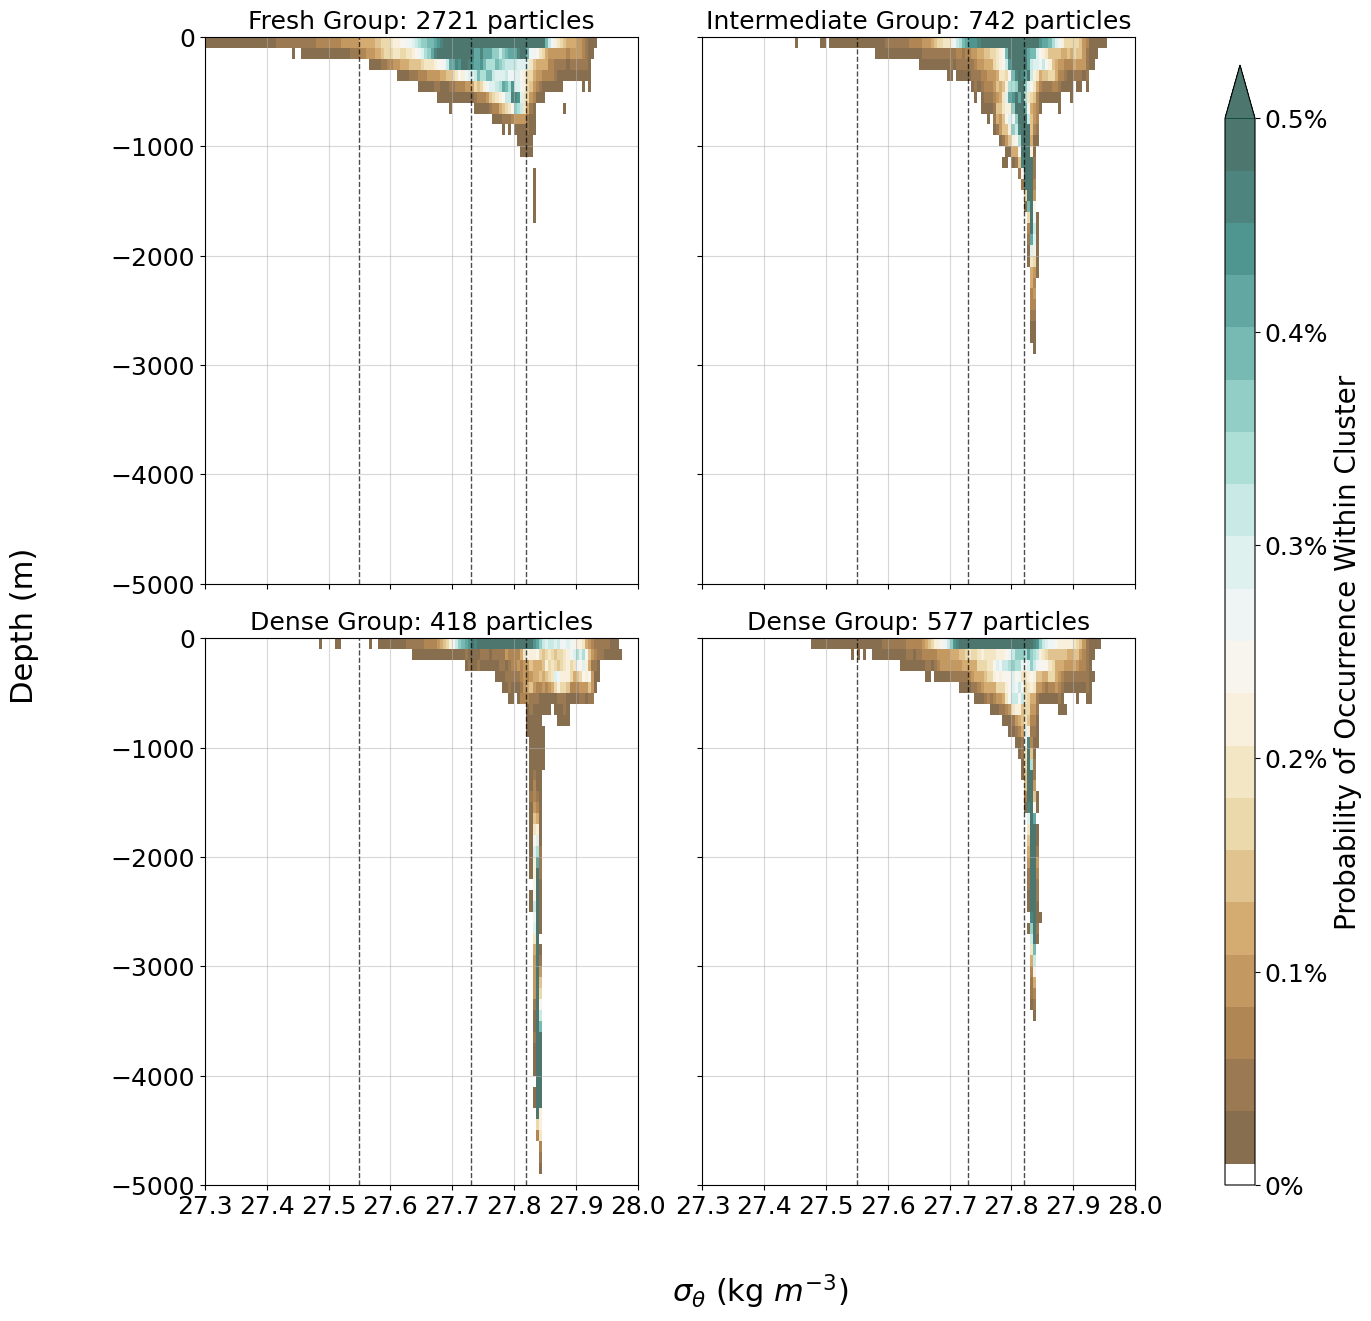

In [39]:
# Plot rho with depth
time = temp.shape[0]
time = np.arange(0, time, 1)
x_time0 = np.tile(time, (depth.shape[1], 1))
x_time0 = x_time0.T
x_time0 = x_time0 * 900 / 86400
time1 = x_time0.astype(int)

# Setup plot
fig, axes = plt.subplots(figsize=(15, 14), nrows=2, ncols=2, sharex=True, sharey=True)
plt.rcParams.update({'font.size': 16})

fig.supxlabel('$\sigma_{\\theta}$ (kg $m^{-3}$)', fontsize=22)
fig.supylabel('Depth (m)', fontsize=22, x=0)

cmap = plt.get_cmap('BrBG', 20).copy()
cmap.set_under(color='white')

# Ticks
xticks = np.arange(27.3, 28.01, 0.1)
yticks = np.arange(0, -5001, -1000)
vlines = [27.55, 27.73, 27.82]



group_names = ["Fresh", "Intermediate", "Dense", "Dense"]

for i, (ax, group) in enumerate(zip(axes.flat, groups)):
    x = rho_pot0[:, group].flatten()
    y = depth[:, group].flatten()

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[140, 50], range=[[27.3, 28], [-5000, 0]])
    C1 = heatmap.T / len(x)

    X = np.linspace(xedges[0], xedges[-1], 141)
    Y = np.linspace(yedges[0], yedges[-1], 51)

    pcm = ax.pcolormesh(X, Y, C1, cmap=cmap, alpha=0.7, vmin=0.0001, vmax=0.005)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlim(27.3, 28)
    ax.set_ylim(-5000, 0)
    ax.grid(alpha=0.5)

    # Add vertical dashed lines at key σ_θ thresholds
    for vline in vlines:
        ax.axvline(vline, color='black', linestyle='--', linewidth=1,alpha=0.7)

    ax.set_title(f"{group_names[i]} Group: {nums[i]} particles", fontsize=18)

# Adjust layout: more space between y-label and plots (left), more space between columns (wspace)
fig.subplots_adjust(bottom=0.1, top=0.92, left=0.13, right=0.75, wspace=0.15, hspace=0.1)

# Add colorbar
cb_ax = fig.add_axes([0.81, 0.1, 0.02, 0.8])
cbar = fig.colorbar(pcm, extend='max', label="Probability of Occurrence Within Cluster", cax=cb_ax)
cbar.ax.tick_params(labelsize=18)
cbar.set_label("Probability of Occurrence Within Cluster", fontsize=20)
cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004, 0.005])
cbar.set_ticklabels(['0%', '0.1%', '0.2%', '0.3%', '0.4%', '0.5%'])

plt.savefig("figure4_rhovsdepth_labeled_vlines.png", dpi=300)

tmin, tmax, smin, smax sizes=, -3.3 3.63 30.69 38.38


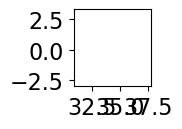

In [40]:
# create the polygons for plotting
# define the polygons for categorizing
# add the polygons and the points
smin = 31 - (0.01 * 31)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 38. + (0.01 * 38.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3 + (0.1 * -3)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 3.3 + (0.1 * 3.3)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 30
# Create empty grid of zeros
dens2 = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti1 = np.linspace(-3,3.3,ydim)
si1 = np.linspace(31,38,xdim)
Freez_temp = gsw.CT_freezing(si1,0,0)

Si, Ti = np.meshgrid(si1, ti1, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens2[j,i]=gsw.rho(si1[i],ti1[j],0)
        # Substract 1000 to convert to sigma-0
dens2 = dens2 - 1000

# convert to practical/potential
long = 73.5089
lat = -66.8245
ti = gsw.pt_from_CT(si1,ti1)
si = gsw.SP_from_SA(si1,0,long,lat)

# create the polygons for the next plot
fig = plt.figure(figsize=(1,1))
ax = fig.add_subplot(1, 1, 1)

# add aabw values
cs = ax.contourf(si, ti, dens2, levels=[27.82,31],colors="black", zorder=1,alpha=0,linestyles='-.')
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.2f")
# get the dens2ity vertices
p = cs.collections[0].get_paths()[0]
v = p.vertices
# get the TS vertices
s = np.array([34.5,36,36,34.5,34.5])
t = np.array([-3,-3,0.1,0.1,-3])
b = np.array([[a,b] for a,b in zip(s,t)])
# # find intersection and plot
a = sg.Polygon(v)
b = sg.Polygon(b)
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[0.1,0.1,max(ft)])
c = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(c)
d = a.intersection(b)
aabw = c.intersection(d)

# find the winter water values
cs = ax.contourf(si, ti, dens2, levels=[27.55,27.73],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[-1.5,-1.5,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
a = sg.Polygon(v)
b = sg.Polygon(b)
ww = a.intersection(b)

# find the mcdw values
cs = ax.contourf(si, ti, dens2, levels=[27.73,27.82],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[1.5,1.5,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
a = sg.Polygon(v)
b = sg.Polygon(b)
mcdw = a.intersection(b)

# --- DSW Polygon ---
# Extract density contour polygon
cs = ax.contourf(si, ti, dens2, levels=[27.82, 31], colors="black", zorder=1, alpha=0, linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)
# DSW polygon boundaries
ft_upper = Freez_temp + 0.1
t_lower = -2.5
# Salinity arrays
si_upper = si1
si_lower = si1[::-1]
# Create polygon
poly_si = np.concatenate([si_upper, si_lower])
poly_t = np.concatenate([ft_upper, np.full_like(si_lower, t_lower)])
polygon_pts = np.column_stack([poly_si, poly_t])
c = sg.Polygon(polygon_pts)

# Intersection
dsw_poly = c.intersection(a)
# Ensure it's a Polygon (not MultiPolygon)
if dsw_poly.is_empty:
    dsw = sg.Polygon()
elif dsw_poly.geom_type == 'Polygon':
    dsw = dsw_poly
else:  # MultiPolygon case
    dsw = max(dsw_poly.geoms, key=lambda g: g.area)  # Take largest part

# find the aasw values
cs = ax.contourf(si, ti, dens2, levels=[24,27.73],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)              # first shape in dens2ity
sx = np.array([34.5,34.5,31,31])
sy = np.array([-3,3.5,3.5,-3])
ss = np.array([[a,b] for a,b in zip(sx,sy)])
b = sg.Polygon(ss)             # second shape in salinity
ft = Freez_temp
ft = np.append(ft,[3.5,3.5])
si2 = si.copy()
si2 = np.append(si2,[35,31])
ta = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(ta)              # third shape in temperature
d = b.intersection(c)
aasw = d.intersection(a)

# --- mSW Polygon ---

# Extract density contour polygon
cs = ax.contourf(si, ti, dens2, levels=[27.82, 31], colors="black", zorder=1, alpha=0, linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)

# mSW polygon boundaries
ft_upper = Freez_temp + 0.1
t_lower = -0.4

# Salinity arrays
si_upper = si1
si_lower = si1[::-1]

# Create polygon
poly_si = np.concatenate([si_upper, si_lower])
poly_t = np.concatenate([ft_upper, np.full_like(si_lower, t_lower)])
polygon_pts = np.column_stack([poly_si, poly_t])
c = sg.Polygon(polygon_pts)

# Intersection
msw_poly = c.intersection(a).difference(dsw)  # Remove DSW region

# Ensure it's a Polygon (not MultiPolygon)
if msw_poly.is_empty:
    msw = sg.Polygon()
elif msw_poly.geom_type == 'Polygon':
    msw = msw_poly
else:  # MultiPolygon case
    msw = max(msw_poly.geoms, key=lambda g: g.area)  # Take largest part

# add ISW values
cs = ax.contourf(si, ti, dens2, levels=[25,27.82],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)
ft = Freez_temp# - 0.05
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[-3,-3,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
b = sg.Polygon(b)
isw = b.intersection(a)
#isw = isw.difference(dsw)
isw = isw.difference(aabw)
#ucdw = ucdw.difference(mcdw)
aasw = aasw.difference(ww)
#aasw = aasw.difference(ucdw)

# find the aaiw values
cs = ax.contourf(si, ti, dens2, levels=[27.2,27.4],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)              # first shape in dens2ity
sx = np.array([34.6,34.6,32,32])
sy = np.array([2,3.5,3.5,2])
ss = np.array([[a,b] for a,b in zip(sx,sy)])
b = sg.Polygon(ss)             # second shape in salinity
ft = Freez_temp
ft = np.append(ft,[3.5,3.5])
si2 = si.copy()
si2 = np.append(si2,[35,31])
ta = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(ta)              # third shape in temperature
d = b.intersection(c)
aaiw = d.intersection(a)

In [41]:
T_wdw = -2.05
S_wdw = 34.5
Lf = 334 # kJ/kg
Cp = gsw.cp_t_exact(S_wdw,T_wdw,0)/1000
print(Cp)

Tgade = T_wdw + (Lf/Cp)*(1 - (S_wdw/si))

3.9907110140574806


In [42]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [40]:
import numpy as np

representative_indices = []

for i, group in enumerate(groups):
    df_group = df.loc[group, ["dT", "dsat", "drho"]]
    centroid = df_group.mean().values
    distances = np.linalg.norm(df_group.values - centroid, axis=1)  # shape: (n_particles,)

    wmt_group = wmt[:, group]
    isw_times = np.sum(wmt_group == 2, axis=0)
    dense_times = np.sum(wmt_group == 3, axis=0)

    if i in [0, 1]:
        # Groups 1 & 2: randomly pick a particle with any WMT == 3
        valid_indices = np.where(dense_times > 0)[0]

        if len(valid_indices) == 0:
            raise ValueError(f"No particles with WMT == 3 in group {i+1}")

        best_idx = np.random.choice(valid_indices)

    else:
        # Groups 3 & 4: choose particle with minimal ISW time & closest to centroid
        min_isw = np.min(isw_times)
        candidates = np.where(isw_times == min_isw)[0]
        best_idx = candidates[np.argmin(distances[candidates])]

    representative_index = df_group.index[best_idx]
    representative_indices.append(representative_index)

print("Representative indices per group:", representative_indices)


Representative indices per group: [1129, 2385, 2770, 2092]


In [43]:
import matplotlib.patheffects as pe
from matplotlib import cm

In [44]:
import numpy as np

representative_indices = []

for i, group in enumerate(groups):
    # 1. Extract starting T and S
    temp_start = temp[0, group]
    salt_start = salt[0, group]
    ts_start = np.stack([temp_start, salt_start], axis=1)

    # 2. Centroid in T–S space
    centroid = np.mean(ts_start, axis=0)
    distances = np.linalg.norm(ts_start - centroid, axis=1)

    # 3. WMT classification
    wmt_group = wmt[:, group]
    dense_times = np.sum(wmt_group == 3, axis=0)
    isw_times   = np.sum(wmt_group == 2, axis=0)

    # 4. Particles that had dense water formation
    valid_dense = np.where(dense_times > 0)[0]
    if len(valid_dense) == 0:
        raise ValueError(f"No particle in group {i+1} experienced WMT == 3.")

    if i == 0:
        # GROUP 1: prioritize top 30% in ISW time among dense particles
        isw_times_dense = isw_times[valid_dense]
        perc_70 = np.percentile(isw_times_dense, 70)
        candidates = valid_dense[isw_times_dense >= perc_70]

        if len(candidates) == 0:
            # fallback to any with WMT==3
            best_idx = valid_dense[np.argmin(distances[valid_dense])]
        else:
            best_idx = candidates[np.argmin(distances[candidates])]

    else:
        # Other groups: prefer WMT==2 and 3 overlap, fallback to WMT==3
        dense_and_isw = np.where((dense_times > 0) & (isw_times > 0))[0]
        intersecting = np.intersect1d(valid_dense, dense_and_isw)

        if len(intersecting) > 0:
            best_idx = intersecting[np.argmin(distances[intersecting])]
        else:
            best_idx = valid_dense[np.argmin(distances[valid_dense])]

    representative_index = group[best_idx]
    representative_indices.append(representative_index)

print("Representative indices per group:", representative_indices)

# Update manually-set array
representative_indicesa = np.array([2755, 2351, 2926, 2556])
representative_indicesa[0] = representative_indices[0]
representative_indices = representative_indicesa


Representative indices per group: [1757, 2610, 3110, 2194]


In [45]:
# Extract group 1
group1 = groups[0]

# Compute T–S centroid and distances
temp_start = temp[0, group1]
salt_start = salt[0, group1]
ts_start = np.stack([temp_start, salt_start], axis=1)
centroid = np.mean(ts_start, axis=0)
distances = np.linalg.norm(ts_start - centroid, axis=1)

# Water mass classifications
wmt_group = wmt[:, group1]
dense_times = np.sum(wmt_group == 3, axis=0)
isw_times = np.sum(wmt_group == 2, axis=0)
final_wmt = wmt[-1, group1]  # Final classification

# Barrier intersection
barrier_in_group1 = np.intersect1d(barrier_i, group1)
barrier_mask = np.isin(group1, barrier_in_group1)

# Build mask
valid_mask = (
    barrier_mask &
    (dense_times > 0) &
    (isw_times > 0) &
    (final_wmt != 2) &        # does NOT end as ISW
    (final_wmt == 1)          # does end as mCDW
)

qualified_indices = np.where(valid_mask)[0]

if len(qualified_indices) == 0:
    raise ValueError("No particle in Group 1 meets all selection criteria.")

# Choose the one closest to the median distance from centroid
qualified_distances = distances[qualified_indices]
median_dist = np.median(qualified_distances)
closest_idx = qualified_indices[np.argmin(np.abs(qualified_distances - median_dist))]

# Final representative
rep_index_group1 = group1[closest_idx]

# Assemble final array
representative_indicesa = np.array([rep_index_group1, 2351, 2926, 2556])
representative_indices = representative_indicesa

print("Final representative indices:", representative_indices)


NameError: name 'barrier_i' is not defined

In [48]:
# representative_indices = np.array([1757, 2351, 2926, 2556]) # chosen based off of starting values
representative_indices = np.array([3160, 2351, 2926, 2556]) # chosen based off of starting values


1
34.504696 -1.3699238
34.445763 -1.3626008

2
34.52176 -1.4124484
34.604755 -0.5342629

3
34.50717 -1.358468
34.64522 -0.31203926

4
34.517746 -1.43939
34.63799 -0.33303377



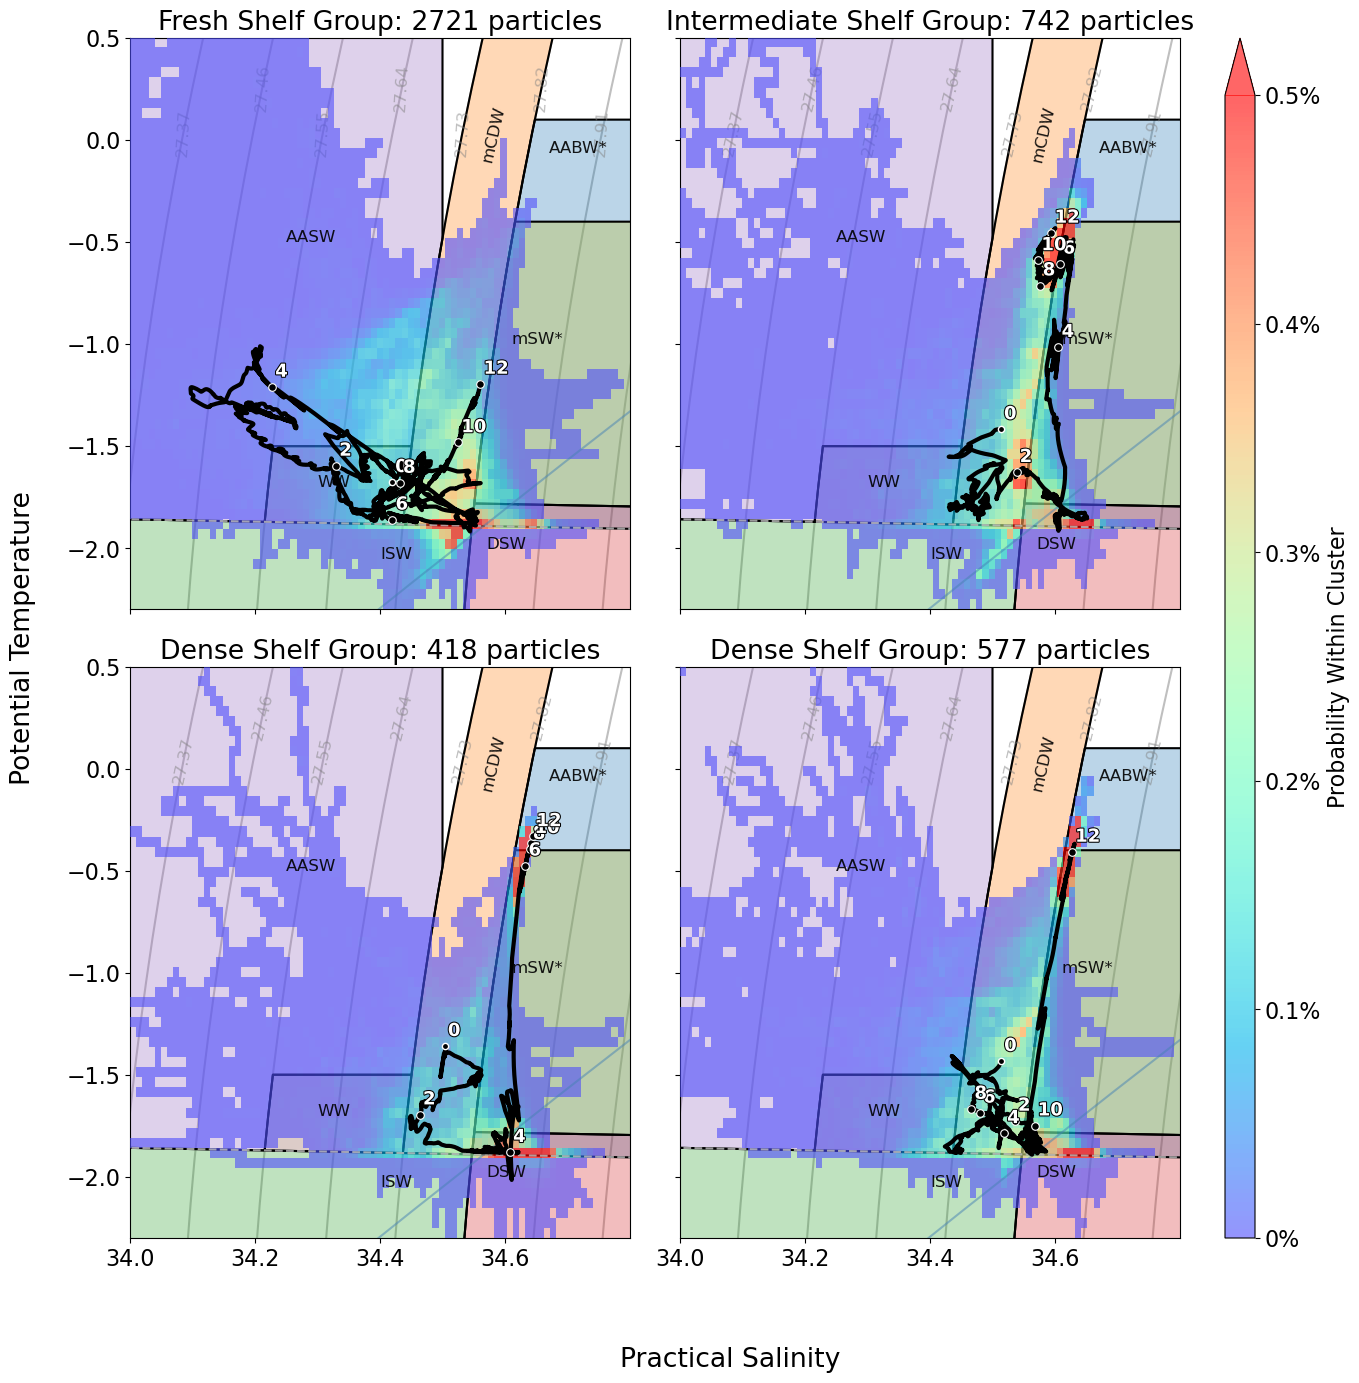

In [51]:
# also try creating a mesh for each of the 6 groups
# fig, axes = plt.subplots(figsize=(15,15),nrows=3, ncols=2,sharex=True,sharey=True)
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# or 4 groups
fig, axes = plt.subplots(figsize=(15,15),nrows=2, ncols=2,sharex=True,sharey=True)
#fig, axes = plt.subplots(figsize=(15,7),nrows=1, ncols=3,sharex=True,sharey=True)
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 16})
i = 1

group_labels = ["Fresh Shelf", "Intermediate Shelf", "Dense Shelf", "Dense Shelf"]

# fig.suptitle("Weekly T-S Averages")
fig.supxlabel('Practical Salinity')
fig.supylabel('Potential Temperature')

# cmap = plt.get_cmap('gray_r',20).copy()
# Use truncated rainbow for mesh
base_cmap = plt.get_cmap('rainbow')
cmap = truncate_colormap(base_cmap, 0.1, 1.0)
cmap.set_under(color='white')

xticks = np.arange(34,34.8,0.2)
yticks = np.arange(0.5,-2.4,-0.5)

for ax,group in zip(axes.flat,groups):
    print(i)
    # make and set the polygons
    shapes = np.array([])
    shapelabels = np.array([])

    # add the potential density lines
    cs = ax.contour(si, ti, dens2, colors="grey", zorder=1,alpha=0.5,levels=[27.37,27.46,27.55,27.64,27.73,27.82,27.91,28])
    cl=plt.clabel(cs,fontsize=12,inline=False,fmt="%.2f")
    h, l = cs.legend_elements()
    h = np.array([h[0]],dtype=object)
    l = np.array(["$\sigma_{θ}$"])

    # add the freezing temperature
    fline = ax.plot(si,Freez_temp,'-',color='silver',linestyle="dashed",label="$T_{f}$",alpha=0.8,zorder=7)
    gadeline = ax.plot(si,Tgade,'-',color='steelblue',label='Gade Line',alpha=0.5,zorder=8)
    h = np.append(h,fline)
    l = np.append(l,"$T_{f}$")
    h = np.append(h,gadeline)
    l = np.append(l,"Gade Line")

    # AABW values
    x, y = aabw.exterior.xy
    aabw2 = ax.plot(x, y,label="AABW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:blue")
    shapes = np.append(shapes,aabw2)
    shapelabels = np.append(shapelabels,"AABW*")
    # MCDW values
    x, y = mcdw.exterior.xy
    mcdw2 = ax.plot(x, y,label="mCDW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:orange")
    shapes = np.append(shapes,mcdw2)
    shapelabels = np.append(shapelabels,"mCDW")
    # # ISW values
    x, y = isw.exterior.xy
    isw2 = ax.plot(x, y,label="ISW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:green")
    shapes = np.append(shapes,isw2)
    shapelabels = np.append(shapelabels,"ISW")
    # # DSW values
    x, y = dsw.exterior.xy
    dsw2 = ax.plot(x, y,label="DSW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:red")
    shapes = np.append(shapes,dsw2)
    shapelabels = np.append(shapelabels,"DSW")
    # # MSW values
    x, y = msw.exterior.xy
    msw2 = ax.plot(x, y,label="mSW*",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:olive")
    shapes = np.append(shapes,msw2)
    shapelabels = np.append(shapelabels,"mSW*")
    # # AASW values
    x, y = aasw.exterior.xy
    aasw2 = ax.plot(x, y,label="AASW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:purple")
    shapes = np.append(shapes,aasw2)
    shapelabels = np.append(shapelabels,"AASW")
    # # WW values
    x, y = ww.exterior.xy
    ww2 = ax.plot(x, y,label="WW",color="black")
    ax.fill(x, y,alpha=0.3,color="tab:brown")
    shapes = np.append(shapes,ww2)
    shapelabels = np.append(shapelabels,"WW")
    # labels and plot
    #legend1 = plt.legend(h,l, loc='upper center', bbox_to_anchor=(0, -0.05), fancybox=True, shadow=True, ncol=5)
    legend1 = plt.legend(h,l, loc='upper center', bbox_to_anchor=(0, -0.5), fancybox=True, shadow=True, ncol=5)

    plt.gca().add_artist(legend1)
    #ax.legend()
    
    
    #####################################################
    # make and set the density plotting
    ax.set_ylim(-2.3, 0.5)
    ax.set_xlim(34,34.8)
    
    # try to add the clustering
    x = (salt[:,group]).flatten()
    y = (temp[:,group]).flatten()
    
    # try again with modified sizes
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[80, 60],range=[[34,34.8], [-2.3, 0.7]])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    C1 = heatmap.T / len(x)
    X = np.arange(xedges[0], xedges[-1], (xedges[-1] - xedges[0]) / 81)  #0.01
    Y = np.arange(yedges[0], yedges[-1], (yedges[-1] - yedges[0]) / 61)  #0.05
    
    # log scaling
    #pcm = ax.pcolormesh(X, Y, C1,norm=colors.LogNorm(vmin=1e-6,vmax=0.005),cmap=cmap,alpha=0.7,zorder=5)
    # or linear scaling - set C1 bad values to np nan first
    C1[C1 == 0] = np.nan
    pcm = ax.pcolormesh(X, Y, C1,cmap=cmap,alpha=0.6,zorder=5,vmax=0.005)
    
    # add scatter of start and end points
    #ax.scatter(salt[:,group][0],temp[:,group][0],marker="o",s=0.3,color="#2b2b2b",zorder=6)
    #ax.scatter(salt[:,group][-1],temp[:,group][-1],marker="o",s=0.3,color="#ff00ee",zorder=6)

    # print the starting and ending averages per group
    print(np.mean(salt[:,group][0]),np.mean(temp[:,group][0]))
    print(np.mean(salt[:,group][-1]),np.mean(temp[:,group][-1]))  
    print()
    
    # add ticks
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # label and plot
    ax.set_title(f"{group_labels[i-1]} Group: {nums[i-1]} particles")
    
    # add the labels
    ax.text(x=34.61, y=-1,s="mSW*",fontsize=12,alpha=0.9,zorder=7,color="black")
    ax.text(x=34.67, y=-0.06,s="AABW*",fontsize=12,alpha=0.9,zorder=7,color="black")
    ax.text(x=34.57, y=-2,s="DSW",fontsize=12,alpha=0.9,zorder=8,color="black")
    ax.text(x=34.56, y=-0.1,s="mCDW",rotation=-283,fontsize=12,alpha=0.9,zorder=7,color="black")
    ax.text(x=34.25, y=-0.5,s="AASW",fontsize=12,alpha=0.9,zorder=7,color="black")
    ax.text(x=34.3, y=-1.7,s="WW",fontsize=12,alpha=0.9,zorder=7,color="black")
    ax.text(x=34.4, y=-2.05,s="ISW",fontsize=12,alpha=0.9,zorder=7,color="black")

    # try to add representative tracks
    rep_idx = representative_indices[i-1]  # i is group index
    # Plot the representative trajectory in T-S space
    # ax.plot(salt[:, rep_idx], temp[:, rep_idx], color='black', linewidth=3, zorder=9, label='Representative Trajectory')
    # ax.scatter(salt[0, rep_idx], temp[0, rep_idx], color='green', marker='o', s=20, zorder=10, label='Start')
    # ax.scatter(salt[-1, rep_idx], temp[-1, rep_idx], color='red', marker='x', s=20, zorder=10, label='End')
    # Plot representative trajectory
    ax.plot(salt[:, rep_idx], temp[:, rep_idx], color='black', linewidth=3, zorder=9, label='Representative Trajectory')
    #ax.scatter(salt[0, rep_idx], temp[0, rep_idx], color='green', marker='o', s=20, zorder=10, label='Start')
    #ax.scatter(salt[-1, rep_idx], temp[-1, rep_idx], color='red', marker='x', s=20, zorder=10, label='End')
    
    # Add markers every 2 months: 0, 2, 4, 6, 8, 10, 12
    n_steps = salt.shape[0]
    month_numbers = np.arange(0, 13, 2)  # [0, 2, 4, ..., 12]
    month_indices = np.linspace(0, n_steps - 1, len(month_numbers), dtype=int)
    colors = cm.get_cmap('plasma', len(month_numbers) - 1)(np.arange(len(month_numbers) - 1))
    
    # First point (month 0), green as before
    ax.scatter(
        salt[month_indices[0], rep_idx],
        temp[month_indices[0], rep_idx],
        color='k',
        marker='o',
        edgecolor="white",
        s=20,
        zorder=10,
        label='Start'
    )
    ax.text(
        salt[month_indices[0], rep_idx] + 0.005,
        temp[month_indices[0], rep_idx] + 0.05,
        f"{month_numbers[0]}",
        fontsize=13,
        weight='bold',
        color='white',
        zorder=12,
        path_effects=[pe.withStroke(linewidth=1.5, foreground='black')]
    )
    
    # Loop over months 2–12
    for ix, (step, month) in enumerate(zip(month_indices[1:], month_numbers[1:])):
        ax.scatter(
            salt[step, rep_idx],
            temp[step, rep_idx],
            color='k',
            s=30,
            edgecolor='white',
            linewidth=0.8,
            zorder=11
        )
        ax.text(
            salt[step, rep_idx] + 0.005,
            temp[step, rep_idx] + 0.05,
            f"{month}",
            fontsize=13,
            weight='bold',
            color='white',
            zorder=12,
            path_effects=[pe.withStroke(linewidth=1.5, foreground='black')]
        )



    i += 1
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.1, hspace=0.1)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(pcm,extend='max',label="Probability Within Cluster",cax = cb_ax)
cbar.set_ticks([0,0.001,0.002,0.003,0.004,.005])
cbar.set_ticklabels(['0%','0.1%','0.2%','0.3%','0.4%','0.5%'])

plt.savefig("figure6.png", dpi=300)

# Figure 6 needs to be done in Puhti